In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime

In [9]:
standard_info = pd.read_csv('./standard_info.csv')
standard_info.drop_duplicates(inplace=True)

C:\Users\Administrator\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3063: DtypeWarning: Columns (2,3) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [10]:
pd.set_option('display.max_columns',None)

In [11]:
standard_info.shape

(6059009, 18)

In [12]:
groups = standard_info.groupby(['user_id','cp_server_no','cp_role_id','role_id','game_id'])

In [13]:
groups.ngroups

808689

In [14]:
standard_info.head()

,user_id,mgame_id,cp_server_no,cp_role_id,role_data_type,role_id,channel_id,source_id,game_id,media_id,create_role_date,create_role_time,role_created_7_login_num,role_created_7_max_role_level,role_created_7_online,pay_sum,role_created_30_pay_sum,source_amount
0,114825296,1056,660845,18145498,4,152028601,6770,298742,1001049,16,2020-06-20,2020-06-20 20:36:16,12,44,8800,0.0,0.0,0.0
1,114825296,1056,660845,18145498,7,152028601,6770,298742,1001049,16,2020-06-20,2020-06-20 20:36:16,12,44,8800,0.0,0.0,0.0
2,114825296,1056,660845,18145498,6,152028601,6770,298742,1001049,16,2020-06-20,2020-06-20 20:36:16,12,44,8800,0.0,0.0,0.0
3,115184473,1056,660920,18251048,0,152016127,6770,298742,1001049,16,2020-06-20,2020-06-20 15:54:56,16,43,25189,0.0,0.0,0.0
4,114825296,1056,660845,18145498,1,152028601,6770,298742,1001049,16,2020-06-20,2020-06-20 20:36:16,8,33,6873,0.0,0.0,0.0


## 计划标准

In [15]:
standard_info_duplicates = standard_info.sort_values('role_data_type').drop_duplicates(['user_id','cp_server_no','cp_role_id'],keep='last')
standard_info_duplicates = standard_info_duplicates[standard_info_duplicates['source_amount']!=0]

In [16]:
standard_info_duplicates['game_id'].value_counts()

1000840    397290
1001049    151513
1000993    112447
1000960     38722
1001258     13120
Name: game_id, dtype: int64

In [17]:
standard_info_duplicates.shape

(713092, 18)

In [18]:
standard_info_duplicates.head()

,user_id,mgame_id,cp_server_no,cp_role_id,role_data_type,role_id,channel_id,source_id,game_id,media_id,create_role_date,create_role_time,role_created_7_login_num,role_created_7_max_role_level,role_created_7_online,pay_sum,role_created_30_pay_sum,source_amount
13433346,115507356,1056,660934,18339591,0,152292268,20754,321941,1001049,10,2020-06-25,2020-06-25 18:05:39,1,5,300,0.0,0.0,133340.67
13433402,115507413,1056,660934,18339548,0,152292182,20754,321941,1001049,10,2020-06-25,2020-06-25 18:05:21,1,2,48,0.0,0.0,133340.67
13433258,115507259,1056,660934,18339483,0,152292044,20754,321941,1001049,10,2020-06-25,2020-06-25 18:04:51,1,7,300,0.0,0.0,133340.67
13433534,115507552,1056,660934,18339664,0,152292416,20754,321941,1001049,10,2020-06-25,2020-06-25 18:06:11,1,1,14,0.0,0.0,133340.67
13433521,115507542,1056,660934,18339686,0,152292466,20754,321941,1001049,10,2020-06-25,2020-06-25 18:06:22,1,4,208,0.0,0.0,133340.67


In [19]:
groups = standard_info_duplicates.groupby(['channel_id','source_id','create_role_date'])
temp = groups['role_created_30_pay_sum'].agg([('source_30_pay_sum','sum')]).reset_index()
standard_info_duplicates = pd.merge(standard_info_duplicates,temp,on=['channel_id','source_id','create_role_date'],how='left',validate='many_to_one')
temp = groups['user_id'].agg([('user_num','count')]).reset_index()
standard_info_duplicates = pd.merge(standard_info_duplicates,temp,on=['channel_id','source_id','create_role_date'],how='left',validate='many_to_one')

In [20]:
standard_info_duplicates['game_id'].value_counts()

1000840    397290
1001049    151513
1000993    112447
1000960     38722
1001258     13120
Name: game_id, dtype: int64

In [21]:
standard_info_duplicates = standard_info_duplicates[['game_id','channel_id','source_id','create_role_date','source_amount','source_30_pay_sum','user_num']].drop_duplicates()

In [22]:
standard_info_duplicates.head()

,game_id,channel_id,source_id,create_role_date,source_amount,source_30_pay_sum,user_num
0,1001049,20754,321941,2020-06-25,133340.67,242394.0,32634
13,1000840,20754,320591,2020-07-02,2889.71,0.0,497
20,1000840,20646,327049,2020-07-09,2941.78,396.0,148
235,1000840,21116,322486,2020-07-02,3113.05,440.0,491
239,1000840,21087,321037,2020-06-22,11.14,0.0,20


In [23]:
standard_info_duplicates.shape

(9897, 7)

In [24]:
# groups = standard_info_duplicates.groupby(['channel_id','source_id','create_role_date'])
# temp = groups['source_amount'].agg([('source_amount_sum','sum')]).reset_index()
# standard_info_duplicates = pd.merge(standard_info_duplicates,temp,on=['channel_id','source_id'],how='left',validate='many_to_one')

In [25]:
standard_info_duplicates['cpc'] = standard_info_duplicates['source_amount'] / (standard_info_duplicates['user_num']+1e-4)
standard_info_duplicates['30_ROI'] = standard_info_duplicates['source_30_pay_sum']/(standard_info_duplicates['source_amount']+1e-4)

In [26]:
standard_info_duplicates['source_30_pay_sum'].sum()

8443328.0

In [27]:
standard_info_duplicates['source_amount'].sum()

20042197.26

In [28]:
standard_info_duplicates['source_30_pay_sum'].sum()/standard_info_duplicates['source_amount'].sum()

0.4212775620590813

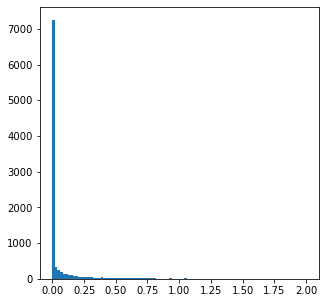

In [29]:
plt.figure(figsize=(5,5))
plt.hist(standard_info_duplicates['30_ROI'],bins=100,range=(0,2))
plt.show()

In [30]:
standard_info_duplicates['30_ROI'].describe()

count      9897.000000
mean         20.409915
std        1629.858894
min           0.000000
25%           0.000000
50%           0.000000
75%           0.029095
max      160698.835275
Name: 30_ROI, dtype: float64

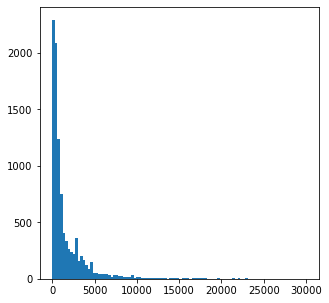

In [31]:
plt.figure(figsize=(5,5))
plt.hist(standard_info_duplicates['source_amount'],bins=100,range=(0,30000))
plt.show()

In [32]:
source_grade_1 = standard_info_duplicates[standard_info_duplicates['source_amount']>=5000]
source_grade_2 = standard_info_duplicates[(standard_info_duplicates['source_amount']<5000)&(standard_info_duplicates['source_amount']>=500)]
source_grade_3 = standard_info_duplicates[standard_info_duplicates['source_amount']<500]

In [33]:
print(source_grade_1.shape[0]/standard_info_duplicates.shape[0])
print(source_grade_2.shape[0]/standard_info_duplicates.shape[0])
print(source_grade_3.shape[0]/standard_info_duplicates.shape[0])

0.07881176113973931
0.5452157219359401
0.3759725169243205


In [40]:
standard_info_duplicates_m = standard_info_duplicates[(standard_info_duplicates['30_ROI']>=0.4)&(standard_info_duplicates['30_ROI']<=0.8)]

In [41]:
standard_info_duplicates.shape

(9897, 9)

In [49]:
standard_info_duplicates[(standard_info_duplicates['30_ROI']<0.5)].shape

(9170, 9)

In [43]:
standard_info_duplicates[(standard_info_duplicates['30_ROI']>0.8)].shape

(515, 9)

In [44]:
9170/9897

0.9265433969889866

In [47]:
316/9897

0.031928867333535414

In [46]:
standard_info_duplicates_m.shape

(316, 9)

In [426]:
standard_info_duplicates_m.head()

,game_id,channel_id,source_id,create_role_date,source_amount,source_30_pay_sum,user_num,cpc,30_ROI
262,1001049,20754,321941,2020-06-26,110020.61,59086.0,18248,6.029187,0.537045
606,1000840,20545,281652,2020-07-07,2378.43,1284.0,131,18.155940,0.539852
738,1000840,20754,328109,2020-07-13,6141.61,3134.0,942,6.519755,0.510290
40056,1000840,20754,322676,2020-07-03,11752.54,7686.0,1109,10.597420,0.653986
40109,1000840,20953,332993,2020-07-19,8322.71,4528.0,75,110.969319,0.544054


In [427]:
standard_info_duplicates_m['game_id'].value_counts()

1000840    111
1000993     59
1001049     22
1000960     14
1001258      6
Name: game_id, dtype: int64

In [428]:
source_grade_1 = standard_info_duplicates_m[standard_info_duplicates_m['source_amount']>=5000]
source_grade_2 = standard_info_duplicates_m[(standard_info_duplicates_m['source_amount']<5000)&(standard_info_duplicates_m['source_amount']>=500)]
source_grade_3 = standard_info_duplicates_m[standard_info_duplicates_m['source_amount']<500]

In [269]:
# # 计划标准创角数source_run_date_act
# print('source_grade_1平均创角数:',round(source_grade_1['user_num'].mean(),0))
# print('source_grade_2平均创角数:',round(source_grade_2['user_num'].mean(),0))
# print('source_grade_3平均创角数:',round(source_grade_3['user_num'].mean(),0))

In [429]:
source_grade_1['game_id'].value_counts()

1000840    23
1000993    18
1001049     6
1000960     2
1001258     1
Name: game_id, dtype: int64

In [430]:
source_grade_2['game_id'].value_counts()

1000840    72
1000993    34
1001049    13
1000960    12
1001258     4
Name: game_id, dtype: int64

In [431]:
source_grade_3['game_id'].value_counts()

1000840    16
1000993     7
1001049     3
1001258     1
Name: game_id, dtype: int64

In [437]:
source_grade_1['game_id'].unique()

array([1001049, 1000840, 1000993, 1000960, 1001258], dtype=int64)

In [703]:
source_grade_1[source_grade_1['game_id'] == 1001258]

,user_id,mgame_id,cp_server_no,cp_role_id,role_data_type,role_id,channel_id,source_id,game_id,media_id,create_role_date,create_role_time,role_created_7_login_num,role_created_7_max_role_level,role_created_7_online,pay_sum,role_created_30_pay_sum,source_amount,pay_sum_nd,source_30_pay_sum,user_num,30_ROI,b_r,m_r,s_r,rubbish,common
306628,117355166,1056,661016,18868891,7,13802313,20143,331344,1001258,16,2020-07-17,2020-07-17 06:39:40,3,32,5100,0.0,0.0,16949.44,3036.0,8734.0,166,0.515297,0,0,0,0,1
306629,117378432,1056,661017,18873404,7,13805034,20143,331344,1001258,16,2020-07-17,2020-07-17 13:22:49,1,1,0,0.0,0.0,16949.44,3036.0,8734.0,166,0.515297,0,0,0,1,0
306630,117420354,1056,661019,18883470,7,13809326,20143,331344,1001258,16,2020-07-17,2020-07-17 20:04:07,1,1,0,0.0,0.0,16949.44,3036.0,8734.0,166,0.515297,0,0,0,1,0
306631,117423771,1056,661019,18884632,7,13809771,20143,331344,1001258,16,2020-07-17,2020-07-17 20:43:47,1,1,0,0.0,0.0,16949.44,3036.0,8734.0,166,0.515297,0,0,0,1,0
306632,117380584,1056,661017,18873921,7,13805225,20143,331344,1001258,16,2020-07-17,2020-07-17 13:39:24,1,1,0,0.0,0.0,16949.44,3036.0,8734.0,166,0.515297,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
306789,117416536,1056,661019,18882417,7,13808854,20143,331344,1001258,16,2020-07-17,2020-07-17 19:23:57,1,1,1,0.0,0.0,16949.44,3036.0,8734.0,166,0.515297,0,0,0,1,0
306790,117417041,1056,661019,18882552,7,13808926,20143,331344,1001258,16,2020-07-17,2020-07-17 19:29:25,1,1,0,0.0,0.0,16949.44,3036.0,8734.0,166,0.515297,0,0,0,1,0
306791,117423234,1056,661019,18884410,7,13809681,20143,331344,1001258,16,2020-07-17,2020-07-17 20:35:22,1,1,1,0.0,0.0,16949.44,3036.0,8734.0,166,0.515297,0,0,0,1,0
306792,117423552,1056,661019,18884492,7,13809717,20143,331344,1001258,16,2020-07-17,2020-07-17 20:38:21,1,1,900,0.0,0.0,16949.44,3036.0,8734.0,166,0.515297,0,0,0,0,1


In [440]:
source_run_date_cost_grade_1 = []
source_run_date_predict_roi_30_grade_1 = []
for game_id in source_grade_1['game_id'].unique():
    source_grade_1_game_id = source_grade_1[source_grade_1['game_id'] == game_id]
    source_run_date_cost_grade_1_game_id = round(source_grade_1_game_id[source_grade_1_game_id['user_num']!=0]['source_amount'].sum()/source_grade_1_game_id[source_grade_1_game_id['user_num']!=0]['user_num'].sum(),2)
    source_run_date_cost_grade_1.append(source_run_date_cost_grade_1_game_id)
    source_run_date_predict_roi_30_grade_1_game_id = round(source_grade_1_game_id['source_30_pay_sum'].sum()/source_grade_1_game_id['source_amount'].sum(),2)
    source_run_date_predict_roi_30_grade_1.append(source_run_date_predict_roi_30_grade_1_game_id)

In [441]:
source_run_date_cost_grade_1

[6.88, 17.55, 76.99, 43.53, 102.11]

In [442]:
source_run_date_predict_roi_30_grade_1

[0.56, 0.66, 0.65, 0.78, 0.52]

In [270]:
# 计划标准成本创角成本source_run_date_cost
print('source_grade_1平均cpc:',round(source_grade_1[source_grade_1['user_num']!=0]['source_amount'].sum()/source_grade_1[source_grade_1['user_num']!=0]['user_num'].sum(),2))
print('source_grade_2平均cpc:',round(source_grade_2[source_grade_2['user_num']!=0]['source_amount'].sum()/source_grade_2[source_grade_2['user_num']!=0]['user_num'].sum(),2))
print('source_grade_3平均cpc:',round(source_grade_3[source_grade_3['user_num']!=0]['source_amount'].sum()/source_grade_3[source_grade_3['user_num']!=0]['user_num'].sum(),2))

source_grade_1平均cpc: 17.42
source_grade_2平均cpc: 21.23
source_grade_3平均cpc: 34.34


In [271]:
print(source_grade_1.shape[0]/standard_info_duplicates_m.shape[0])
print(source_grade_2.shape[0]/standard_info_duplicates_m.shape[0])
print(source_grade_3.shape[0]/standard_info_duplicates_m.shape[0])

0.2358490566037736
0.6367924528301887
0.12735849056603774


In [272]:
# 计划标准30日roi   source_run_date_predict_roi_30
print('source_grade_1平均30日ROI',round(source_grade_1['source_30_pay_sum'].sum()/source_grade_1['source_amount'].sum(),2))
print('source_grade_2平均30日ROI',round(source_grade_2['source_30_pay_sum'].sum()/source_grade_2['source_amount'].sum(),2))
print('source_grade_3平均30日ROI',round(source_grade_3['source_30_pay_sum'].sum()/source_grade_3['source_amount'].sum(),2))

source_grade_1平均30日ROI 0.64
source_grade_2平均30日ROI 0.63
source_grade_3平均30日ROI 0.63


# 用户质量

In [553]:
standard_info.shape

(6059009, 18)

In [559]:
standard_info_duplicates = standard_info[standard_info['role_data_type'] == 7]

In [563]:
standard_info_duplicates.head()

,user_id,mgame_id,cp_server_no,cp_role_id,role_data_type,role_id,channel_id,source_id,game_id,media_id,create_role_date,create_role_time,role_created_7_login_num,role_created_7_max_role_level,role_created_7_online,pay_sum,role_created_30_pay_sum,source_amount,b_r,m_r,s_r,rubbish,common
1,114825296,1056,660845,18145498,7,152028601,6770,298742,1001049,16,2020-06-20,2020-06-20 20:36:16,12,44,8800,0.0,0.0,0.00,0,0,0,0,1
10,115184473,1056,660920,18251048,7,152016127,6770,298742,1001049,16,2020-06-20,2020-06-20 15:54:56,79,66,108898,0.0,0.0,0.00,0,0,0,0,1
24,115173868,1056,660919,18247222,7,152006867,6770,319238,1000840,10,2020-06-20,2020-06-20 13:03:33,1,2,75,0.0,0.0,281.85,0,0,0,1,0
38,115173888,1056,660919,18247231,7,152006882,6770,319238,1000840,10,2020-06-20,2020-06-20 13:03:39,1,9,616,0.0,0.0,281.85,0,0,0,0,1
41,115173495,1056,660919,18247104,7,152006551,6770,319238,1000840,10,2020-06-20,2020-06-20 12:57:34,1,1,21,0.0,0.0,281.85,0,0,0,1,0


In [ ]:
standard_info_duplicates_m = standard_info_duplicates[(standard_info_duplicates['30_ROI']>=0.5)&(standard_info_duplicates['30_ROI']<=0.8)]

In [562]:
standard_info_duplicates['b_r'] = (standard_info_duplicates['role_created_30_pay_sum']>=2000).astype(int)
standard_info_duplicates['m_r'] = ((standard_info_duplicates['role_created_30_pay_sum']<2000) & (standard_info_duplicates['role_created_30_pay_sum']>=100)).astype(int)
standard_info_duplicates['s_r'] = ((standard_info_duplicates['role_created_30_pay_sum']<100) & (standard_info_duplicates['role_created_30_pay_sum']>0)).astype(int)
standard_info_duplicates['rubbish'] = ((standard_info_duplicates['role_created_7_online']<=600) & (standard_info_duplicates['role_created_7_login_num']<=2)&
                            (standard_info_duplicates['role_created_7_max_role_level']<=10)&(standard_info_duplicates['role_created_30_pay_sum']==0)).astype(int)
standard_info_duplicates['common'] = (~((standard_info_duplicates['role_created_7_online']<=600) & (standard_info_duplicates['role_created_7_login_num']<=2)&
                (standard_info_duplicates['role_created_7_max_role_level']<=10)) &(standard_info_duplicates['role_created_30_pay_sum']==0)).astype(int)

C:\Users\Administrator\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\Users\Administrator\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\Administrator\anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value ins

## 7d

In [709]:
standard_info_duplicates = standard_info[standard_info['role_data_type'] == 7].drop_duplicates(['user_id','cp_server_no','cp_role_id'])
standard_info_duplicates = standard_info_duplicates[standard_info_duplicates['source_amount']!=0]

In [710]:
groups = standard_info_duplicates.groupby(['channel_id','source_id','create_role_date'])
temp = groups['pay_sum'].agg([('pay_sum_nd','sum')]).reset_index()
standard_info_duplicates = pd.merge(standard_info_duplicates,temp,on=['channel_id','source_id','create_role_date'],how='left',validate='many_to_one')
temp = groups['role_created_30_pay_sum'].agg([('source_30_pay_sum','sum')]).reset_index()
standard_info_duplicates = pd.merge(standard_info_duplicates,temp,on=['channel_id','source_id','create_role_date'],how='left',validate='many_to_one')
temp = groups['user_id'].agg([('user_num','count')]).reset_index()
standard_info_duplicates = pd.merge(standard_info_duplicates,temp,on=['channel_id','source_id','create_role_date'],how='left',validate='many_to_one')

In [711]:
standard_info_duplicates['30_ROI'] = standard_info_duplicates['source_30_pay_sum']/(standard_info_duplicates['source_amount']+1e-4)

# standard_info_duplicates['cpc'] = standard_info_duplicates['source_amount'] / (standard_info_duplicates['user_num']+1e-4)


In [610]:
standard_info_duplicates.head()

,user_id,mgame_id,cp_server_no,cp_role_id,role_data_type,role_id,channel_id,source_id,game_id,media_id,create_role_date,create_role_time,role_created_7_login_num,role_created_7_max_role_level,role_created_7_online,pay_sum,role_created_30_pay_sum,source_amount,pay_sum_nd,source_30_pay_sum,user_num,30_ROI
0,115173868,1056,660919,18247222,7,152006867,6770,319238,1000840,10,2020-06-20,2020-06-20 13:03:33,1,2,75,0.0,0.0,281.85,0.0,0.0,117,0.0
1,115173888,1056,660919,18247231,7,152006882,6770,319238,1000840,10,2020-06-20,2020-06-20 13:03:39,1,9,616,0.0,0.0,281.85,0.0,0.0,117,0.0
2,115173495,1056,660919,18247104,7,152006551,6770,319238,1000840,10,2020-06-20,2020-06-20 12:57:34,1,1,21,0.0,0.0,281.85,0.0,0.0,117,0.0
3,115178752,1056,660919,18248959,7,152011106,6770,319238,1000840,10,2020-06-20,2020-06-20 14:16:20,1,1,2312,0.0,0.0,281.85,0.0,0.0,117,0.0
4,115159028,1056,660918,18242704,7,151993681,6770,319238,1000840,10,2020-06-20,2020-06-20 06:30:44,1,4,191,0.0,0.0,281.85,0.0,0.0,117,0.0


In [611]:
standard_info_duplicates.shape

(673040, 22)

In [612]:
standard_info_duplicates['b_r'] = (standard_info_duplicates['role_created_30_pay_sum']>=2000).astype(int)
standard_info_duplicates['m_r'] = ((standard_info_duplicates['role_created_30_pay_sum']<2000) & (standard_info_duplicates['role_created_30_pay_sum']>=100)).astype(int)
standard_info_duplicates['s_r'] = ((standard_info_duplicates['role_created_30_pay_sum']<100) & (standard_info_duplicates['role_created_30_pay_sum']>0)).astype(int)
standard_info_duplicates['rubbish'] = ((standard_info_duplicates['role_created_7_online']<=600) & (standard_info_duplicates['role_created_7_login_num']<=2)&
                            (standard_info_duplicates['role_created_7_max_role_level']<=10)&(standard_info_duplicates['role_created_30_pay_sum']==0)).astype(int)
standard_info_duplicates['common'] = (~((standard_info_duplicates['role_created_7_online']<=600) & (standard_info_duplicates['role_created_7_login_num']<=2)&
                (standard_info_duplicates['role_created_7_max_role_level']<=10)) &(standard_info_duplicates['role_created_30_pay_sum']==0)).astype(int)

In [613]:
standard_info_duplicates.head()

,user_id,mgame_id,cp_server_no,cp_role_id,role_data_type,role_id,channel_id,source_id,game_id,media_id,create_role_date,create_role_time,role_created_7_login_num,role_created_7_max_role_level,role_created_7_online,pay_sum,role_created_30_pay_sum,source_amount,pay_sum_nd,source_30_pay_sum,user_num,30_ROI,b_r,m_r,s_r,rubbish,common
0,115173868,1056,660919,18247222,7,152006867,6770,319238,1000840,10,2020-06-20,2020-06-20 13:03:33,1,2,75,0.0,0.0,281.85,0.0,0.0,117,0.0,0,0,0,1,0
1,115173888,1056,660919,18247231,7,152006882,6770,319238,1000840,10,2020-06-20,2020-06-20 13:03:39,1,9,616,0.0,0.0,281.85,0.0,0.0,117,0.0,0,0,0,0,1
2,115173495,1056,660919,18247104,7,152006551,6770,319238,1000840,10,2020-06-20,2020-06-20 12:57:34,1,1,21,0.0,0.0,281.85,0.0,0.0,117,0.0,0,0,0,1,0
3,115178752,1056,660919,18248959,7,152011106,6770,319238,1000840,10,2020-06-20,2020-06-20 14:16:20,1,1,2312,0.0,0.0,281.85,0.0,0.0,117,0.0,0,0,0,0,1
4,115159028,1056,660918,18242704,7,151993681,6770,319238,1000840,10,2020-06-20,2020-06-20 06:30:44,1,4,191,0.0,0.0,281.85,0.0,0.0,117,0.0,0,0,0,1,0


In [712]:
standard_info_duplicates = standard_info_duplicates[['channel_id','source_id','game_id','create_role_date','source_amount','pay_sum_nd',
                                                     'source_30_pay_sum','user_num','30_ROI']].drop_duplicates()

In [599]:
# standard_info_duplicates['source_30_pay_sum'].sum()/standard_info_duplicates['source_amount'].sum()

In [600]:
# source_grade_1 = standard_info_duplicates[standard_info_duplicates['source_amount']>=5000]
# source_grade_2 = standard_info_duplicates[(standard_info_duplicates['source_amount']<5000)&(standard_info_duplicates['source_amount']>=500)]
# source_grade_3 = standard_info_duplicates[standard_info_duplicates['source_amount']<500]

In [601]:
# print(source_grade_1.shape[0]/standard_info_duplicates.shape[0])
# print(source_grade_2.shape[0]/standard_info_duplicates.shape[0])
# print(source_grade_3.shape[0]/standard_info_duplicates.shape[0])

In [713]:
standard_info_duplicates_m = standard_info_duplicates[(standard_info_duplicates['30_ROI']>=0.5)&(standard_info_duplicates['30_ROI']<=0.8)]

In [714]:
standard_info_duplicates_m.head()

,channel_id,source_id,game_id,create_role_date,source_amount,pay_sum_nd,source_30_pay_sum,user_num,30_ROI
806,20540,320077,1000960,2020-06-20,664.42,314.0,344.0,54,0.517745
2751,20954,320873,1000993,2020-06-20,240.62,48.0,158.0,2,0.656637
3726,20144,278278,1000993,2020-06-21,8741.48,2954.0,4782.0,175,0.547047
6321,6867,284945,1001049,2020-06-22,4665.53,1870.0,2968.0,171,0.636155
7101,20646,319415,1001049,2020-06-22,971.01,700.0,766.0,23,0.788869


In [715]:
source_grade_1 = standard_info_duplicates_m[standard_info_duplicates_m['source_amount']>=5000]
source_grade_2 = standard_info_duplicates_m[(standard_info_duplicates_m['source_amount']<5000)&(standard_info_duplicates_m['source_amount']>=500)]
source_grade_3 = standard_info_duplicates_m[standard_info_duplicates_m['source_amount']<500]

In [719]:
df1 = source_grade_3[source_grade_3['game_id'] == 1001258]

In [720]:
df1

,channel_id,source_id,game_id,create_role_date,source_amount,pay_sum_nd,source_30_pay_sum,user_num,30_ROI
401776,20954,328262,1001258,2020-07-13,115.45,60.0,60.0,3,0.519705


In [633]:
source_run_7date_bigrate_grade_1 = []
source_run_7date_midrate_grade_1 = []
source_run_7date_minrate_grade_1 = []
source_run_7date_comrate_grade_1 = []
source_run_7date_rubrate_grade_1 = []
for game_id in source_grade_1['game_id'].unique():
    source_grade_1_game_id = source_grade_1[source_grade_1['game_id'] == game_id]
    source_run_7date_bigrate_grade_1_game_id = round(source_grade_1_game_id['b_r'].sum()/source_grade_1_game_id.shape[0],4)
    source_run_7date_bigrate_grade_1.append(source_run_7date_bigrate_grade_1_game_id)
    
    source_run_7date_midrate_grade_1_game_id = round(source_grade_1_game_id['m_r'].sum()/source_grade_1_game_id.shape[0],4)
    source_run_7date_midrate_grade_1.append(source_run_7date_midrate_grade_1_game_id)
    
    source_run_7date_minrate_grade_1_game_id = round(source_grade_1_game_id['s_r'].sum()/source_grade_1_game_id.shape[0],4)
    source_run_7date_minrate_grade_1.append(source_run_7date_minrate_grade_1_game_id)
    
    source_run_7date_comrate_grade_1_game_id = round(source_grade_1_game_id['common'].sum()/source_grade_1_game_id.shape[0],4)
    source_run_7date_comrate_grade_1.append(source_run_7date_comrate_grade_1_game_id)
    
    source_run_7date_rubrate_grade_1_game_id = round(source_grade_1_game_id['rubbish'].sum()/source_grade_1_game_id.shape[0],4)
    source_run_7date_rubrate_grade_1.append(source_run_7date_rubrate_grade_1_game_id)

In [635]:
source_run_7date_midrate_grade_1

[0.0111, 0.004, 0.0042, 0.0048, 0.006]

In [636]:
source_run_7date_minrate_grade_1

[0.0137, 0.0057, 0.0047, 0.008, 0.0181]

In [637]:
source_run_7date_comrate_grade_1

[0.5789, 0.1996, 0.1263, 0.3489, 0.1988]

In [639]:
source_run_7date_rubrate_grade_1

[0.39, 0.7889, 0.8639, 0.6318, 0.7711]

In [578]:
source_run_date_cost_grade_1

[76.08, 12.9, 5.76, 33.4, 102.11]

In [605]:
source_run_date_cost_grade_1

[76.99, 17.46, 9.39, 43.53, 102.11]

In [606]:
source_run_date_predict_roi_30_grade_1

[0.65, 0.65, 0.61, 0.78, 0.52]

In [579]:
source_run_date_predict_roi_30_grade_1

[0.66, 0.64, 0.61, 0.78, 0.52]

In [580]:
source_run_date_roi_7_grade_1

[0.29, 0.41, 0.29, 0.33, 0.18]

In [482]:
source_info_2 = pd.DataFrame(columns=['source_cost','standard_run_date','game_id','source_run_date_cost','source_run_date_roi_7','source_run_date_predict_roi_30'])

In [483]:
source_info_2

,source_cost,standard_run_date,game_id,source_run_date_cost,source_run_date_roi_7,source_run_date_predict_roi_30


In [484]:
source_info_2['game_id'] = source_grade_1['game_id'].unique()
source_info_2['source_run_date_cost'] = source_run_date_cost_grade_1
source_info_2['source_run_date_roi_7'] = source_run_date_roi_7_grade_1
source_info_2['source_run_date_predict_roi_30'] = source_run_date_predict_roi_30_grade_1
source_info_2['source_cost'] = '>=5000'
source_info_2['standard_run_date'] = datetime.date.today()

In [485]:
source_info_2

,source_cost,standard_run_date,game_id,source_run_date_cost,source_run_date_roi_7,source_run_date_predict_roi_30
0,>=5000,2020-08-21,1000993,76.99,0.30,0.65
1,>=5000,2020-08-21,1000840,17.46,0.37,0.65
2,>=5000,2020-08-21,1001049,9.39,0.26,0.61
3,>=5000,2020-08-21,1000960,43.53,0.33,0.78
4,>=5000,2020-08-21,1001258,102.11,0.18,0.52


In [321]:
# 计划标准成本创角成本source_run_date_cost
print('source_grade_1平均cpc:',round(source_grade_1[source_grade_1['user_num']!=0]['source_amount'].sum()/source_grade_1[source_grade_1['user_num']!=0]['user_num'].sum(),2))
print('source_grade_2平均cpc:',round(source_grade_2[source_grade_2['user_num']!=0]['source_amount'].sum()/source_grade_2[source_grade_2['user_num']!=0]['user_num'].sum(),2))
print('source_grade_3平均cpc:',round(source_grade_3[source_grade_3['user_num']!=0]['source_amount'].sum()/source_grade_3[source_grade_3['user_num']!=0]['user_num'].sum(),2))

source_grade_1平均cpc: 25.97
source_grade_2平均cpc: 21.12
source_grade_3平均cpc: 34.34


In [322]:
# 计划标准30日roi   source_run_date_predict_roi_30
print('source_grade_1平均30日ROI',round(source_grade_1['source_30_pay_sum'].sum()/source_grade_1['source_amount'].sum(),2))
print('source_grade_2平均30日ROI',round(source_grade_2['source_30_pay_sum'].sum()/source_grade_2['source_amount'].sum(),2))
print('source_grade_3平均30日ROI',round(source_grade_3['source_30_pay_sum'].sum()/source_grade_3['source_amount'].sum(),2))

source_grade_1平均30日ROI 0.65
source_grade_2平均30日ROI 0.63
source_grade_3平均30日ROI 0.63


In [323]:
source_grade_1.head()

,channel_id,source_id,create_role_date,source_amount,pay_sum_nd,source_30_pay_sum,user_num,cpc,30_ROI
3726,20144,278278,2020-06-21,8741.48,2954.0,4782.0,175,49.951286,0.547047
11576,6867,320869,2020-06-25,15396.22,2876.0,10640.0,907,16.974882,0.691079
17683,20754,322323,2020-06-26,11704.04,1952.0,7036.0,1293,9.051848,0.601160
21466,20754,321941,2020-06-27,18998.77,5956.0,11740.0,3834,4.955339,0.617935
30351,6867,284945,2020-06-29,11754.30,3168.0,7824.0,204,57.619089,0.665629


In [325]:
# 计划标准7日roi   source_run_date_roi_7
print('source_grade_1计划标准7日roi',round(source_grade_1['pay_sum_nd'].sum()/source_grade_1['source_amount'].sum(),2))
print('source_grade_2计划标准7日roi',round(source_grade_2['pay_sum_nd'].sum()/source_grade_2['source_amount'].sum(),2))
print('source_grade_3计划标准7日roi',round(source_grade_3['pay_sum_nd'].sum()/source_grade_3['source_amount'].sum(),2))

source_grade_1计划标准7日roi 0.32
source_grade_2计划标准7日roi 0.31
source_grade_3计划标准7日roi 0.46


n天

In [542]:
# # n天
# def standard_compute(standard_info):
#     source_info_2_grade_1 = pd.DataFrame(columns=['source_cost','standard_run_date','game_id','source_run_date_cost','source_run_date_roi_1',
#                                                       'source_run_date_roi_2','source_run_date_roi_3','source_run_date_roi_4','source_run_date_roi_5',
#                                                       'source_run_date_roi_6','source_run_date_roi_7','source_run_date_predict_roi_30'])
#     source_info_2_grade_2 = pd.DataFrame(columns=['source_cost','standard_run_date','game_id','source_run_date_cost','source_run_date_roi_1',
#                                                       'source_run_date_roi_2','source_run_date_roi_3','source_run_date_roi_4','source_run_date_roi_5',
#                                                       'source_run_date_roi_6','source_run_date_roi_7','source_run_date_predict_roi_30'])
#     source_info_2_grade_3 = pd.DataFrame(columns=['source_cost','standard_run_date','game_id','source_run_date_cost','source_run_date_roi_1',
#                                                       'source_run_date_roi_2','source_run_date_roi_3','source_run_date_roi_4','source_run_date_roi_5',
#                                                       'source_run_date_roi_6','source_run_date_roi_7','source_run_date_predict_roi_30'])
#     for i in range(1,8):
#         standard_info_duplicates = standard_info[standard_info['role_data_type'] == i].drop_duplicates(['user_id','cp_server_no','cp_role_id'])
#         standard_info_duplicates = standard_info_duplicates[standard_info_duplicates['source_amount']!=0]
#         groups = standard_info_duplicates.groupby(['channel_id','source_id','create_role_date'])
#         temp = groups['pay_sum'].agg([('pay_sum_nd','sum')]).reset_index()
#         standard_info_duplicates = pd.merge(standard_info_duplicates,temp,on=['channel_id','source_id','create_role_date'],how='left',validate='many_to_one')
#         temp = groups['role_created_30_pay_sum'].agg([('source_30_pay_sum','sum')]).reset_index()
#         standard_info_duplicates = pd.merge(standard_info_duplicates,temp,on=['channel_id','source_id','create_role_date'],how='left',validate='many_to_one')
#         temp = groups['user_id'].agg([('user_num','count')]).reset_index()
#         standard_info_duplicates = pd.merge(standard_info_duplicates,temp,on=['channel_id','source_id','create_role_date'],how='left',validate='many_to_one')
#         standard_info_duplicates = standard_info_duplicates[['channel_id','source_id','game_id','create_role_date','source_amount','pay_sum_nd',
#                                                          'source_30_pay_sum','user_num']].drop_duplicates()
#         standard_info_duplicates['30_ROI'] = standard_info_duplicates['source_30_pay_sum']/(standard_info_duplicates['source_amount']+1e-4)

#         standard_info_duplicates_m = standard_info_duplicates[(standard_info_duplicates['30_ROI']>=0.5)&(standard_info_duplicates['30_ROI']<=0.8)]
#         source_grade_1 = standard_info_duplicates_m[standard_info_duplicates_m['source_amount']>=5000]
#         source_grade_2 = standard_info_duplicates_m[(standard_info_duplicates_m['source_amount']<5000)&(standard_info_duplicates_m['source_amount']>=500)]
#         source_grade_3 = standard_info_duplicates_m[standard_info_duplicates_m['source_amount']<500]
#         # grade_1
#         if len(source_grade_1['game_id'].unique())!=0:
#             if i ==1:
#                 source_run_date_cost_grade_1 = []
#                 source_run_date_predict_roi_30_grade_1 = []
                
#                 for game_id in source_grade_1['game_id'].unique():
#                     source_grade_1_game_id = source_grade_1[source_grade_1['game_id'] == game_id]
#                     source_run_date_cost_grade_1_game_id = round(source_grade_1_game_id[source_grade_1_game_id['user_num']!=0]['source_amount'].sum()/source_grade_1_game_id[source_grade_1_game_id['user_num']!=0]['user_num'].sum(),2)
#                     source_run_date_cost_grade_1.append(source_run_date_cost_grade_1_game_id)

#                     source_run_date_predict_roi_30_grade_1_game_id = round(source_grade_1_game_id['source_30_pay_sum'].sum()/source_grade_1_game_id['source_amount'].sum(),2)
#                     source_run_date_predict_roi_30_grade_1.append(source_run_date_predict_roi_30_grade_1_game_id)
                
#             exec("source_run_date_roi_%s_grade_1 = []"%(i))
#             for game_id in source_grade_1['game_id'].unique():
#                 source_grade_1_game_id = source_grade_1[source_grade_1['game_id'] == game_id]
#                 exec("source_run_date_roi_%s_grade_1_game_id = round(source_grade_1_game_id['pay_sum_nd'].sum()/source_grade_1_game_id['source_amount'].sum(),2)"%(i))
#                 exec("source_run_date_roi_%s_grade_1.append(source_run_date_roi_%s_grade_1_game_id)"%(i,i))
            
#         # grade_2
#         if len(source_grade_2['game_id'].unique())!=0:
#             if i ==1:
#                 source_run_date_cost_grade_2 = []
#                 source_run_date_predict_roi_30_grade_2 = []
                
#                 for game_id in source_grade_2['game_id'].unique():
#                     source_grade_2_game_id = source_grade_2[source_grade_2['game_id'] == game_id]
#                     source_run_date_cost_grade_2_game_id = round(source_grade_2_game_id[source_grade_2_game_id['user_num']!=0]['source_amount'].sum()/source_grade_2_game_id[source_grade_2_game_id['user_num']!=0]['user_num'].sum(),2)
#                     source_run_date_cost_grade_2.append(source_run_date_cost_grade_2_game_id)

#                     source_run_date_predict_roi_30_grade_2_game_id = round(source_grade_2_game_id['source_30_pay_sum'].sum()/source_grade_2_game_id['source_amount'].sum(),2)
#                     source_run_date_predict_roi_30_grade_2.append(source_run_date_predict_roi_30_grade_2_game_id)
                
#             exec("source_run_date_roi_%s_grade_2 = []"%(i))
#             for game_id in source_grade_2['game_id'].unique():
#                 source_grade_2_game_id = source_grade_2[source_grade_2['game_id'] == game_id]
#                 exec("source_run_date_roi_%s_grade_2_game_id = round(source_grade_2_game_id['pay_sum_nd'].sum()/source_grade_2_game_id['source_amount'].sum(),2)"%(i))
#                 exec("source_run_date_roi_%s_grade_2.append(source_run_date_roi_%s_grade_2_game_id)"%(i,i))
            
           

#         # grade_3
#         if len(source_grade_3['game_id'].unique())!=0:
#             if i ==1:
#                 source_run_date_cost_grade_3 = []
#                 source_run_date_predict_roi_30_grade_3 = []
                
#                 for game_id in source_grade_3['game_id'].unique():
#                     source_grade_3_game_id = source_grade_3[source_grade_3['game_id'] == game_id]
#                     source_run_date_cost_grade_3_game_id = round(source_grade_3_game_id[source_grade_3_game_id['user_num']!=0]['source_amount'].sum()/source_grade_3_game_id[source_grade_3_game_id['user_num']!=0]['user_num'].sum(),2)
#                     source_run_date_cost_grade_3.append(source_run_date_cost_grade_3_game_id)

#                     source_run_date_predict_roi_30_grade_3_game_id = round(source_grade_3_game_id['source_30_pay_sum'].sum()/source_grade_3_game_id['source_amount'].sum(),2)
#                     source_run_date_predict_roi_30_grade_3.append(source_run_date_predict_roi_30_grade_3_game_id)
                
#             exec("source_run_date_roi_%s_grade_3 = []"%(i))
#             for game_id in source_grade_3['game_id'].unique():
#                 source_grade_3_game_id = source_grade_3[source_grade_3['game_id'] == game_id]
#                 exec("source_run_date_roi_%s_grade_3_game_id = round(source_grade_3_game_id['pay_sum_nd'].sum()/source_grade_3_game_id['source_amount'].sum(),2)"%(i))
#                 exec("source_run_date_roi_%s_grade_3.append(source_run_date_roi_%s_grade_3_game_id)"%(i,i))
            
#         source_info_2_grade_1['game_id'] = source_grade_1['game_id'].unique()
#         source_info_2_grade_1['source_run_date_cost'] = source_run_date_cost_grade_1
#         exec("source_info_2_grade_1['source_run_date_roi_%s'] = source_run_date_roi_%s_grade_1"%(i,i))
#         source_info_2_grade_1['source_run_date_predict_roi_30'] = source_run_date_predict_roi_30_grade_1
#         source_info_2_grade_1['source_cost'] = '>=5000'
#         source_info_2_grade_1['standard_run_date'] = datetime.date.today()

#         source_info_2_grade_2['game_id'] = source_grade_2['game_id'].unique()
#         source_info_2_grade_2['source_run_date_cost'] = source_run_date_cost_grade_2
#         exec("source_info_2_grade_2['source_run_date_roi_%s'] = source_run_date_roi_%s_grade_2"%(i,i))
#         source_info_2_grade_2['source_run_date_predict_roi_30'] = source_run_date_predict_roi_30_grade_2
#         source_info_2_grade_2['source_cost'] = '<5000 and >=500'
#         source_info_2_grade_2['standard_run_date'] = datetime.date.today()

    
#         source_info_2_grade_3['game_id'] = source_grade_3['game_id'].unique()
#         source_info_2_grade_3['source_run_date_cost'] = source_run_date_cost_grade_3
#         exec("source_info_2_grade_3['source_run_date_roi_%s'] = source_run_date_roi_%s_grade_3"%(i,i))
#         source_info_2_grade_3['source_run_date_predict_roi_30'] = source_run_date_predict_roi_30_grade_3
#         source_info_2_grade_3['source_cost'] = '<500'
#         source_info_2_grade_3['standard_run_date'] = datetime.date.today()
    
#     source_info_2 = pd.concat([source_info_2_grade_1,source_info_2_grade_2,source_info_2_grade_3]).reset_index(drop=True)
#     return source_info_2

In [550]:
# n天
def standard_compute(standard_info):
    source_info_2_grade_1 = pd.DataFrame(columns=['source_cost','standard_run_date','game_id','source_run_date_cost','source_run_date_roi_1',
                                                      'source_run_date_roi_2','source_run_date_roi_3','source_run_date_roi_4','source_run_date_roi_5',
                                                      'source_run_date_roi_6','source_run_date_roi_7','source_run_date_predict_roi_30'])
    source_info_2_grade_2 = pd.DataFrame(columns=['source_cost','standard_run_date','game_id','source_run_date_cost','source_run_date_roi_1',
                                                      'source_run_date_roi_2','source_run_date_roi_3','source_run_date_roi_4','source_run_date_roi_5',
                                                      'source_run_date_roi_6','source_run_date_roi_7','source_run_date_predict_roi_30'])
    source_info_2_grade_3 = pd.DataFrame(columns=['source_cost','standard_run_date','game_id','source_run_date_cost','source_run_date_roi_1',
                                                      'source_run_date_roi_2','source_run_date_roi_3','source_run_date_roi_4','source_run_date_roi_5',
                                                      'source_run_date_roi_6','source_run_date_roi_7','source_run_date_predict_roi_30'])
    for i in range(1,8):
        standard_info_duplicates = standard_info[standard_info['role_data_type'] == i].drop_duplicates(['user_id','cp_server_no','cp_role_id'])
        standard_info_duplicates = standard_info_duplicates[standard_info_duplicates['source_amount']!=0]
        groups = standard_info_duplicates.groupby(['channel_id','source_id','create_role_date'])
        temp = groups['pay_sum'].agg([('pay_sum_nd','sum')]).reset_index()
        standard_info_duplicates = pd.merge(standard_info_duplicates,temp,on=['channel_id','source_id','create_role_date'],how='left',validate='many_to_one')
        temp = groups['role_created_30_pay_sum'].agg([('source_30_pay_sum','sum')]).reset_index()
        standard_info_duplicates = pd.merge(standard_info_duplicates,temp,on=['channel_id','source_id','create_role_date'],how='left',validate='many_to_one')
        temp = groups['user_id'].agg([('user_num','count')]).reset_index()
        standard_info_duplicates = pd.merge(standard_info_duplicates,temp,on=['channel_id','source_id','create_role_date'],how='left',validate='many_to_one')
        standard_info_duplicates = standard_info_duplicates[['channel_id','source_id','game_id','create_role_date','source_amount','pay_sum_nd',
                                                         'source_30_pay_sum','user_num']].drop_duplicates()
        standard_info_duplicates['30_ROI'] = standard_info_duplicates['source_30_pay_sum']/(standard_info_duplicates['source_amount']+1e-4)

        standard_info_duplicates_m = standard_info_duplicates[(standard_info_duplicates['30_ROI']>=0.5)&(standard_info_duplicates['30_ROI']<=0.8)]
        source_grade_1 = standard_info_duplicates_m[standard_info_duplicates_m['source_amount']>=5000]
        source_grade_2 = standard_info_duplicates_m[(standard_info_duplicates_m['source_amount']<5000)&(standard_info_duplicates_m['source_amount']>=500)]
        source_grade_3 = standard_info_duplicates_m[standard_info_duplicates_m['source_amount']<500]
        
        # grade_1
        if len(source_grade_1['game_id'].unique())!=0:
            source_run_date_cost_grade_1 = []
            source_run_date_predict_roi_30_grade_1 = []
            exec("source_run_date_roi_%s_grade_1 = []"%(i))    
            for game_id in source_grade_1['game_id'].unique():
                source_grade_1_game_id = source_grade_1[source_grade_1['game_id'] == game_id]
                source_run_date_cost_grade_1_game_id = round(source_grade_1_game_id[source_grade_1_game_id['user_num']!=0]['source_amount'].sum()/source_grade_1_game_id[source_grade_1_game_id['user_num']!=0]['user_num'].sum(),2)
                source_run_date_cost_grade_1.append(source_run_date_cost_grade_1_game_id)
                source_run_date_predict_roi_30_grade_1_game_id = round(source_grade_1_game_id['source_30_pay_sum'].sum()/source_grade_1_game_id['source_amount'].sum(),2)
                source_run_date_predict_roi_30_grade_1.append(source_run_date_predict_roi_30_grade_1_game_id)
                exec("source_run_date_roi_%s_grade_1_game_id = round(source_grade_1_game_id['pay_sum_nd'].sum()/source_grade_1_game_id['source_amount'].sum(),2)"%(i))
                exec("source_run_date_roi_%s_grade_1.append(source_run_date_roi_%s_grade_1_game_id)"%(i,i))
            
        # grade_2
        if len(source_grade_2['game_id'].unique())!=0:
            source_run_date_cost_grade_2 = []
            source_run_date_predict_roi_30_grade_2 = []
            exec("source_run_date_roi_%s_grade_2 = []"%(i))    
            for game_id in source_grade_2['game_id'].unique():
                source_grade_2_game_id = source_grade_2[source_grade_2['game_id'] == game_id]
                source_run_date_cost_grade_2_game_id = round(source_grade_2_game_id[source_grade_2_game_id['user_num']!=0]['source_amount'].sum()/source_grade_2_game_id[source_grade_2_game_id['user_num']!=0]['user_num'].sum(),2)
                source_run_date_cost_grade_2.append(source_run_date_cost_grade_2_game_id)
                source_run_date_predict_roi_30_grade_2_game_id = round(source_grade_2_game_id['source_30_pay_sum'].sum()/source_grade_2_game_id['source_amount'].sum(),2)
                source_run_date_predict_roi_30_grade_2.append(source_run_date_predict_roi_30_grade_2_game_id)
                exec("source_run_date_roi_%s_grade_2_game_id = round(source_grade_2_game_id['pay_sum_nd'].sum()/source_grade_2_game_id['source_amount'].sum(),2)"%(i))
                exec("source_run_date_roi_%s_grade_2.append(source_run_date_roi_%s_grade_2_game_id)"%(i,i))
            
           

        # grade_3
        if len(source_grade_3['game_id'].unique())!=0:
            
            source_run_date_cost_grade_3 = []
            source_run_date_predict_roi_30_grade_3 = []
            exec("source_run_date_roi_%s_grade_3 = []"%(i))    
            for game_id in source_grade_3['game_id'].unique():
                source_grade_3_game_id = source_grade_3[source_grade_3['game_id'] == game_id]
                source_run_date_cost_grade_3_game_id = round(source_grade_3_game_id[source_grade_3_game_id['user_num']!=0]['source_amount'].sum()/source_grade_3_game_id[source_grade_3_game_id['user_num']!=0]['user_num'].sum(),2)
                source_run_date_cost_grade_3.append(source_run_date_cost_grade_3_game_id)

                source_run_date_predict_roi_30_grade_3_game_id = round(source_grade_3_game_id['source_30_pay_sum'].sum()/source_grade_3_game_id['source_amount'].sum(),2)
                source_run_date_predict_roi_30_grade_3.append(source_run_date_predict_roi_30_grade_3_game_id)
                
                exec("source_run_date_roi_%s_grade_3_game_id = round(source_grade_3_game_id['pay_sum_nd'].sum()/source_grade_3_game_id['source_amount'].sum(),2)"%(i))
                exec("source_run_date_roi_%s_grade_3.append(source_run_date_roi_%s_grade_3_game_id)"%(i,i))
                                           
        source_info_2_grade_1['game_id'] = source_grade_1['game_id'].unique()
        source_info_2_grade_1['source_run_date_cost'] = source_run_date_cost_grade_1
        exec("source_info_2_grade_1['source_run_date_roi_%s'] = source_run_date_roi_%s_grade_1"%(i,i))
        source_info_2_grade_1['source_run_date_predict_roi_30'] = source_run_date_predict_roi_30_grade_1
        source_info_2_grade_1['source_cost'] = '>=5000'
        source_info_2_grade_1['standard_run_date'] = datetime.date.today()
   
        source_info_2_grade_2['game_id'] = source_grade_2['game_id'].unique()
        source_info_2_grade_2['source_run_date_cost'] = source_run_date_cost_grade_2
        exec("source_info_2_grade_2['source_run_date_roi_%s'] = source_run_date_roi_%s_grade_2"%(i,i))
        source_info_2_grade_2['source_run_date_predict_roi_30'] = source_run_date_predict_roi_30_grade_2
        source_info_2_grade_2['source_cost'] = '<5000 and >=500'
        source_info_2_grade_2['standard_run_date'] = datetime.date.today()

        source_info_2_grade_3['game_id'] = source_grade_3['game_id'].unique()
        source_info_2_grade_3['source_run_date_cost'] = source_run_date_cost_grade_3
        exec("source_info_2_grade_3['source_run_date_roi_%s'] = source_run_date_roi_%s_grade_3"%(i,i))
        source_info_2_grade_3['source_run_date_predict_roi_30'] = source_run_date_predict_roi_30_grade_3
        source_info_2_grade_3['source_cost'] = '<500'
        source_info_2_grade_3['standard_run_date'] = datetime.date.today()
    
    source_info_2 = pd.concat([source_info_2_grade_1,source_info_2_grade_2,source_info_2_grade_3]).reset_index(drop=True)
    return source_info_2

In [551]:
source_info_2 = standard_compute(standard_info)

In [552]:
source_info_2

,source_cost,standard_run_date,game_id,source_run_date_cost,source_run_date_roi_1,source_run_date_roi_2,source_run_date_roi_3,source_run_date_roi_4,source_run_date_roi_5,source_run_date_roi_6,source_run_date_roi_7,source_run_date_predict_roi_30
0,>=5000,2020-08-21,1000993,76.99,0.08,0.14,0.19,0.21,0.24,0.27,0.30,0.65
1,>=5000,2020-08-21,1000840,17.46,0.09,0.16,0.25,0.29,0.32,0.35,0.37,0.65
2,>=5000,2020-08-21,1001049,9.39,0.08,0.14,0.17,0.22,0.24,0.25,0.26,0.61
3,>=5000,2020-08-21,1000960,43.53,0.08,0.17,0.27,0.29,0.32,0.33,0.33,0.78
4,>=5000,2020-08-21,1001258,102.11,0.02,0.02,0.02,0.09,0.18,0.18,0.18,0.52
5,<5000 and >=500,2020-08-21,1000960,9.92,0.12,0.21,0.23,0.28,0.28,0.30,0.32,0.65
6,<5000 and >=500,2020-08-21,1001049,27.40,0.11,0.20,0.25,0.29,0.31,0.32,0.35,0.66
7,<5000 and >=500,2020-08-21,1000993,39.98,0.13,0.20,0.22,0.24,0.26,0.27,0.28,0.62
8,<5000 and >=500,2020-08-21,1000840,18.16,0.09,0.15,0.19,0.22,0.27,0.30,0.32,0.63
9,<5000 and >=500,2020-08-21,1001258,28.95,0.18,0.22,0.25,0.25,0.30,0.33,0.40,0.62


In [ ]:
# n天
def standard_compute(standard_info):
    # 用户质量维度
    columns = ['source_run_7date_bigrate','source_run_7date_midrate','source_run_7date_minrate',
                                                      'source_run_7date_comrate','source_run_7date_rubrate']
    for i in range(1,4):
        exec("source_info_2_grade_%s_user = pd.DataFrame(columns=columns)"%(i))
    
    standard_info_duplicates_user = standard_info[standard_info['role_data_type'] == 7].drop_duplicates(['user_id','cp_server_no','cp_role_id'])
    standard_info_duplicates_user = standard_info_duplicates_user[standard_info_duplicates_user['source_amount']!=0]
    standard_info_duplicates_user['b_r'] = (standard_info_duplicates_user['role_created_30_pay_sum']>=2000).astype(int)
    standard_info_duplicates_user['m_r'] = ((standard_info_duplicates_user['role_created_30_pay_sum']<2000) & (standard_info_duplicates_user['role_created_30_pay_sum']>=100)).astype(int)
    standard_info_duplicates_user['s_r'] = ((standard_info_duplicates_user['role_created_30_pay_sum']<100) & (standard_info_duplicates_user['role_created_30_pay_sum']>0)).astype(int)
    standard_info_duplicates_user['rubbish'] = ((standard_info_duplicates_user['role_created_7_online']<=600) & (standard_info_duplicates_user['role_created_7_login_num']<=2)&
                                (standard_info_duplicates_user['role_created_7_max_role_level']<=10)&(standard_info_duplicates_user['role_created_30_pay_sum']==0)).astype(int)
    standard_info_duplicates_user['common'] = (~((standard_info_duplicates_user['role_created_7_online']<=600) & (standard_info_duplicates_user['role_created_7_login_num']<=2)&
                (standard_info_duplicates_user['role_created_7_max_role_level']<=10)) &(standard_info_duplicates_user['role_created_30_pay_sum']==0)).astype(int)
    groups = standard_info_duplicates_user.groupby(['channel_id','source_id','create_role_date'])
    
    temp = groups['role_created_30_pay_sum'].agg([('source_30_pay_sum','sum')]).reset_index()
    standard_info_duplicates_user = pd.merge(standard_info_duplicates_user,temp,on=['channel_id','source_id','create_role_date'],how='left',validate='many_to_one')
    
    standard_info_duplicates_user['30_ROI'] = standard_info_duplicates_user['source_30_pay_sum']/(standard_info_duplicates_user['source_amount']+1e-4)

    standard_info_duplicates_m_user = standard_info_duplicates_user[(standard_info_duplicates_user['30_ROI']>=0.5)&(standard_info_duplicates_user['30_ROI']<=0.8)]
    source_grade_1_user = standard_info_duplicates_m_user[standard_info_duplicates_m_user['source_amount']>=5000]
    source_grade_2_user = standard_info_duplicates_m_user[(standard_info_duplicates_m_user['source_amount']<5000)&(standard_info_duplicates_m_user['source_amount']>=500)]
    source_grade_3_user = standard_info_duplicates_m_user[standard_info_duplicates_m_user['source_amount']<500]
    
    # grade_1
    if len(source_grade_1_user['game_id'].unique())!=0:
        source_run_7date_bigrate_grade_1 = []
        source_run_7date_midrate_grade_1 = []
        source_run_7date_minrate_grade_1 = []
        source_run_7date_comrate_grade_1 = []
        source_run_7date_rubrate_grade_1 = []
#         cols = ['b_r','m_r','s_r','common','rubbish']
        for game_id in source_grade_1_user['game_id'].unique():
            source_grade_1_game_id = source_grade_1_user[source_grade_1_user['game_id'] == game_id]
            
            source_run_7date_bigrate_grade_1_game_id = round(source_grade_1_game_id['b_r'].sum()/source_grade_1_game_id.shape[0],4)
            source_run_7date_bigrate_grade_1.append(source_run_7date_bigrate_grade_1_game_id)

            source_run_7date_midrate_grade_1_game_id = round(source_grade_1_game_id['m_r'].sum()/source_grade_1_game_id.shape[0],4)
            source_run_7date_midrate_grade_1.append(source_run_7date_midrate_grade_1_game_id)

            source_run_7date_minrate_grade_1_game_id = round(source_grade_1_game_id['s_r'].sum()/source_grade_1_game_id.shape[0],4)
            source_run_7date_minrate_grade_1.append(source_run_7date_minrate_grade_1_game_id)

            source_run_7date_comrate_grade_1_game_id = round(source_grade_1_game_id['common'].sum()/source_grade_1_game_id.shape[0],4)
            source_run_7date_comrate_grade_1.append(source_run_7date_comrate_grade_1_game_id)

            source_run_7date_rubrate_grade_1_game_id = round(source_grade_1_game_id['rubbish'].sum()/source_grade_1_game_id.shape[0],4)
            source_run_7date_rubrate_grade_1.append(source_run_7date_rubrate_grade_1_game_id)
    
    # grade_2
    if len(source_grade_2_user['game_id'].unique())!=0:
        source_run_7date_bigrate_grade_2 = []
        source_run_7date_midrate_grade_2 = []
        source_run_7date_minrate_grade_2 = []
        source_run_7date_comrate_grade_2 = []
        source_run_7date_rubrate_grade_2 = []
        for game_id in source_grade_2_user['game_id'].unique():
            source_grade_2_game_id = source_grade_2_user[source_grade_2_user['game_id'] == game_id]
            source_run_7date_bigrate_grade_2_game_id = round(source_grade_2_game_id['b_r'].sum()/source_grade_2_game_id.shape[0],4)
            source_run_7date_bigrate_grade_2.append(source_run_7date_bigrate_grade_2_game_id)

            source_run_7date_midrate_grade_2_game_id = round(source_grade_2_game_id['m_r'].sum()/source_grade_2_game_id.shape[0],4)
            source_run_7date_midrate_grade_2.append(source_run_7date_midrate_grade_2_game_id)

            source_run_7date_minrate_grade_2_game_id = round(source_grade_2_game_id['s_r'].sum()/source_grade_2_game_id.shape[0],4)
            source_run_7date_minrate_grade_2.append(source_run_7date_minrate_grade_2_game_id)

            source_run_7date_comrate_grade_2_game_id = round(source_grade_2_game_id['common'].sum()/source_grade_2_game_id.shape[0],4)
            source_run_7date_comrate_grade_2.append(source_run_7date_comrate_grade_2_game_id)

            source_run_7date_rubrate_grade_2_game_id = round(source_grade_2_game_id['rubbish'].sum()/source_grade_2_game_id.shape[0],4)
            source_run_7date_rubrate_grade_2.append(source_run_7date_rubrate_grade_2_game_id)
    
    # grade_3
    if len(source_grade_3_user['game_id'].unique())!=0:
        source_run_7date_bigrate_grade_3 = []
        source_run_7date_midrate_grade_3 = []
        source_run_7date_minrate_grade_3 = []
        source_run_7date_comrate_grade_3 = []
        source_run_7date_rubrate_grade_3 = []
        for game_id in source_grade_3_user['game_id'].unique():
            source_grade_3_game_id = source_grade_3_user[source_grade_3_user['game_id'] == game_id]
            source_run_7date_bigrate_grade_3_game_id = round(source_grade_3_game_id['b_r'].sum()/source_grade_3_game_id.shape[0],4)
            source_run_7date_bigrate_grade_3.append(source_run_7date_bigrate_grade_3_game_id)

            source_run_7date_midrate_grade_3_game_id = round(source_grade_3_game_id['m_r'].sum()/source_grade_3_game_id.shape[0],4)
            source_run_7date_midrate_grade_3.append(source_run_7date_midrate_grade_3_game_id)

            source_run_7date_minrate_grade_3_game_id = round(source_grade_3_game_id['s_r'].sum()/source_grade_3_game_id.shape[0],4)
            source_run_7date_minrate_grade_3.append(source_run_7date_minrate_grade_3_game_id)

            source_run_7date_comrate_grade_3_game_id = round(source_grade_3_game_id['common'].sum()/source_grade_3_game_id.shape[0],4)
            source_run_7date_comrate_grade_3.append(source_run_7date_comrate_grade_3_game_id)

            source_run_7date_rubrate_grade_3_game_id = round(source_grade_3_game_id['rubbish'].sum()/source_grade_3_game_id.shape[0],4)
            source_run_7date_rubrate_grade_3.append(source_run_7date_rubrate_grade_3_game_id)
            
    
    source_info_2_grade_1_user['source_run_7date_bigrate'] = source_run_7date_bigrate_grade_1
    source_info_2_grade_1_user['source_run_7date_midrate'] = source_run_7date_midrate_grade_1
    source_info_2_grade_1_user['source_run_7date_minrate'] = source_run_7date_minrate_grade_1
    source_info_2_grade_1_user['source_run_7date_comrate'] = source_run_7date_comrate_grade_1
    source_info_2_grade_1_user['source_run_7date_rubrate'] = source_run_7date_rubrate_grade_1
    

   
    source_info_2_grade_2_user['source_run_7date_bigrate'] = source_run_7date_bigrate_grade_2
    source_info_2_grade_2_user['source_run_7date_midrate'] = source_run_7date_midrate_grade_2
    source_info_2_grade_2_user['source_run_7date_minrate'] = source_run_7date_minrate_grade_2
    source_info_2_grade_2_user['source_run_7date_comrate'] = source_run_7date_comrate_grade_2
    source_info_2_grade_2_user['source_run_7date_rubrate'] = source_run_7date_rubrate_grade_2

    
    source_info_2_grade_3_user['source_run_7date_bigrate'] = source_run_7date_bigrate_grade_3
    source_info_2_grade_3_user['source_run_7date_midrate'] = source_run_7date_midrate_grade_3
    source_info_2_grade_3_user['source_run_7date_minrate'] = source_run_7date_minrate_grade_3
    source_info_2_grade_3_user['source_run_7date_comrate'] = source_run_7date_comrate_grade_3
    source_info_2_grade_3_user['source_run_7date_rubrate'] = source_run_7date_rubrate_grade_3 
    
    source_info_2_user = pd.concat([source_info_2_grade_1_user,source_info_2_grade_2_user,source_info_2_grade_3_user]).reset_index(drop=True)        
            
    # 计划成本、ROI维度
    source_info_2_grade_1 = pd.DataFrame(columns=['source_cost','standard_run_date','game_id','source_run_date_cost','source_run_date_roi_1',
                                                      'source_run_date_roi_2','source_run_date_roi_3','source_run_date_roi_4','source_run_date_roi_5',
                                                      'source_run_date_roi_6','source_run_date_roi_7','source_run_date_predict_roi_30'])
    source_info_2_grade_2 = pd.DataFrame(columns=['source_cost','standard_run_date','game_id','source_run_date_cost','source_run_date_roi_1',
                                                      'source_run_date_roi_2','source_run_date_roi_3','source_run_date_roi_4','source_run_date_roi_5',
                                                      'source_run_date_roi_6','source_run_date_roi_7','source_run_date_predict_roi_30'])
    source_info_2_grade_3 = pd.DataFrame(columns=['source_cost','standard_run_date','game_id','source_run_date_cost','source_run_date_roi_1',
                                                      'source_run_date_roi_2','source_run_date_roi_3','source_run_date_roi_4','source_run_date_roi_5',
                                                      'source_run_date_roi_6','source_run_date_roi_7','source_run_date_predict_roi_30'])
    for i in range(1,8):
        standard_info_duplicates = standard_info[standard_info['role_data_type'] == i].drop_duplicates(['user_id','cp_server_no','cp_role_id'])
        standard_info_duplicates = standard_info_duplicates[standard_info_duplicates['source_amount']!=0]
        groups = standard_info_duplicates.groupby(['channel_id','source_id','create_role_date'])
        temp = groups['pay_sum'].agg([('pay_sum_nd','sum')]).reset_index()
        standard_info_duplicates = pd.merge(standard_info_duplicates,temp,on=['channel_id','source_id','create_role_date'],how='left',validate='many_to_one')
        temp = groups['role_created_30_pay_sum'].agg([('source_30_pay_sum','sum')]).reset_index()
        standard_info_duplicates = pd.merge(standard_info_duplicates,temp,on=['channel_id','source_id','create_role_date'],how='left',validate='many_to_one')
        temp = groups['user_id'].agg([('user_num','count')]).reset_index()
        standard_info_duplicates = pd.merge(standard_info_duplicates,temp,on=['channel_id','source_id','create_role_date'],how='left',validate='many_to_one')
        standard_info_duplicates = standard_info_duplicates[['channel_id','source_id','game_id','create_role_date','source_amount','pay_sum_nd',
                                                         'source_30_pay_sum','user_num']].drop_duplicates()
        standard_info_duplicates['30_ROI'] = standard_info_duplicates['source_30_pay_sum']/(standard_info_duplicates['source_amount']+1e-4)

        standard_info_duplicates_m = standard_info_duplicates[(standard_info_duplicates['30_ROI']>=0.5)&(standard_info_duplicates['30_ROI']<=0.8)]
        source_grade_1 = standard_info_duplicates_m[standard_info_duplicates_m['source_amount']>=5000]
        source_grade_2 = standard_info_duplicates_m[(standard_info_duplicates_m['source_amount']<5000)&(standard_info_duplicates_m['source_amount']>=500)]
        source_grade_3 = standard_info_duplicates_m[standard_info_duplicates_m['source_amount']<500]
        
        # grade_1
        if len(source_grade_1['game_id'].unique())!=0:
            source_run_date_cost_grade_1 = []
            source_run_date_predict_roi_30_grade_1 = []
            exec("source_run_date_roi_%s_grade_1 = []"%(i))    
            for game_id in source_grade_1['game_id'].unique():
                source_grade_1_game_id = source_grade_1[source_grade_1['game_id'] == game_id]
                source_run_date_cost_grade_1_game_id = round(source_grade_1_game_id[source_grade_1_game_id['user_num']!=0]['source_amount'].sum()/source_grade_1_game_id[source_grade_1_game_id['user_num']!=0]['user_num'].sum(),2)
                source_run_date_cost_grade_1.append(source_run_date_cost_grade_1_game_id)
                source_run_date_predict_roi_30_grade_1_game_id = round(source_grade_1_game_id['source_30_pay_sum'].sum()/source_grade_1_game_id['source_amount'].sum(),6)
                source_run_date_predict_roi_30_grade_1.append(source_run_date_predict_roi_30_grade_1_game_id)
                exec("source_run_date_roi_%s_grade_1_game_id = round(source_grade_1_game_id['pay_sum_nd'].sum()/source_grade_1_game_id['source_amount'].sum(),6)"%(i))
                exec("source_run_date_roi_%s_grade_1.append(source_run_date_roi_%s_grade_1_game_id)"%(i,i))
            
        # grade_2
        if len(source_grade_2['game_id'].unique())!=0:
            source_run_date_cost_grade_2 = []
            source_run_date_predict_roi_30_grade_2 = []
            exec("source_run_date_roi_%s_grade_2 = []"%(i))    
            for game_id in source_grade_2['game_id'].unique():
                source_grade_2_game_id = source_grade_2[source_grade_2['game_id'] == game_id]
                source_run_date_cost_grade_2_game_id = round(source_grade_2_game_id[source_grade_2_game_id['user_num']!=0]['source_amount'].sum()/source_grade_2_game_id[source_grade_2_game_id['user_num']!=0]['user_num'].sum(),2)
                source_run_date_cost_grade_2.append(source_run_date_cost_grade_2_game_id)
                source_run_date_predict_roi_30_grade_2_game_id = round(source_grade_2_game_id['source_30_pay_sum'].sum()/source_grade_2_game_id['source_amount'].sum(),6)
                source_run_date_predict_roi_30_grade_2.append(source_run_date_predict_roi_30_grade_2_game_id)
                exec("source_run_date_roi_%s_grade_2_game_id = round(source_grade_2_game_id['pay_sum_nd'].sum()/source_grade_2_game_id['source_amount'].sum(),6)"%(i))
                exec("source_run_date_roi_%s_grade_2.append(source_run_date_roi_%s_grade_2_game_id)"%(i,i))
            
           

        # grade_3
        if len(source_grade_3['game_id'].unique())!=0:
            
            source_run_date_cost_grade_3 = []
            source_run_date_predict_roi_30_grade_3 = []
            exec("source_run_date_roi_%s_grade_3 = []"%(i))    
            for game_id in source_grade_3['game_id'].unique():
                source_grade_3_game_id = source_grade_3[source_grade_3['game_id'] == game_id]
                source_run_date_cost_grade_3_game_id = round(source_grade_3_game_id[source_grade_3_game_id['user_num']!=0]['source_amount'].sum()/source_grade_3_game_id[source_grade_3_game_id['user_num']!=0]['user_num'].sum(),2)
                source_run_date_cost_grade_3.append(source_run_date_cost_grade_3_game_id)

                source_run_date_predict_roi_30_grade_3_game_id = round(source_grade_3_game_id['source_30_pay_sum'].sum()/source_grade_3_game_id['source_amount'].sum(),6)
                source_run_date_predict_roi_30_grade_3.append(source_run_date_predict_roi_30_grade_3_game_id)
                
                exec("source_run_date_roi_%s_grade_3_game_id = round(source_grade_3_game_id['pay_sum_nd'].sum()/source_grade_3_game_id['source_amount'].sum(),6)"%(i))
                exec("source_run_date_roi_%s_grade_3.append(source_run_date_roi_%s_grade_3_game_id)"%(i,i))
                                           
        source_info_2_grade_1['game_id'] = source_grade_1['game_id'].unique()
        source_info_2_grade_1['source_run_date_cost'] = source_run_date_cost_grade_1
        exec("source_info_2_grade_1['source_run_date_roi_%s'] = source_run_date_roi_%s_grade_1"%(i,i))
        source_info_2_grade_1['source_run_date_predict_roi_30'] = source_run_date_predict_roi_30_grade_1
        source_info_2_grade_1['source_cost'] = '>=5000'
        source_info_2_grade_1['standard_run_date'] = datetime.date.today()
   
        source_info_2_grade_2['game_id'] = source_grade_2['game_id'].unique()
        source_info_2_grade_2['source_run_date_cost'] = source_run_date_cost_grade_2
        exec("source_info_2_grade_2['source_run_date_roi_%s'] = source_run_date_roi_%s_grade_2"%(i,i))
        source_info_2_grade_2['source_run_date_predict_roi_30'] = source_run_date_predict_roi_30_grade_2
        source_info_2_grade_2['source_cost'] = '<5000 and >=500'
        source_info_2_grade_2['standard_run_date'] = datetime.date.today()

        source_info_2_grade_3['game_id'] = source_grade_3['game_id'].unique()
        source_info_2_grade_3['source_run_date_cost'] = source_run_date_cost_grade_3
        exec("source_info_2_grade_3['source_run_date_roi_%s'] = source_run_date_roi_%s_grade_3"%(i,i))
        source_info_2_grade_3['source_run_date_predict_roi_30'] = source_run_date_predict_roi_30_grade_3
        source_info_2_grade_3['source_cost'] = '<500'
        source_info_2_grade_3['standard_run_date'] = datetime.date.today()
    
    source_info_2 = pd.concat([source_info_2_grade_1,source_info_2_grade_2,source_info_2_grade_3]).reset_index(drop=True)
    df = pd.concat([source_info_2,source_info_2_user], axis=1)
    return df

In [3]:
# n天
def standard_compute(standard_info):
    # 用户质量维度
    source_info_2_grade_1_user = pd.DataFrame(columns=['source_run_7date_bigrate','source_run_7date_midrate','source_run_7date_minrate',
                                                      'source_run_7date_comrate','source_run_7date_rubrate'])
    source_info_2_grade_2_user = pd.DataFrame(columns=['source_run_7date_bigrate','source_run_7date_midrate','source_run_7date_minrate',
                                                      'source_run_7date_comrate','source_run_7date_rubrate'])
    source_info_2_grade_3_user = pd.DataFrame(columns=['source_run_7date_bigrate','source_run_7date_midrate','source_run_7date_minrate',
                                                      'source_run_7date_comrate','source_run_7date_rubrate'])
    
    standard_info_duplicates_user = standard_info[standard_info['role_data_type'] == 7].drop_duplicates(['user_id','cp_server_no','cp_role_id'])
    standard_info_duplicates_user = standard_info_duplicates_user[standard_info_duplicates_user['source_amount']!=0]
    standard_info_duplicates_user['b_r'] = (standard_info_duplicates_user['role_created_30_pay_sum']>=2000).astype(int)
    standard_info_duplicates_user['m_r'] = ((standard_info_duplicates_user['role_created_30_pay_sum']<2000) & (standard_info_duplicates_user['role_created_30_pay_sum']>=100)).astype(int)
    standard_info_duplicates_user['s_r'] = ((standard_info_duplicates_user['role_created_30_pay_sum']<100) & (standard_info_duplicates_user['role_created_30_pay_sum']>0)).astype(int)
    standard_info_duplicates_user['rubbish'] = ((standard_info_duplicates_user['role_created_7_online']<=600) & (standard_info_duplicates_user['role_created_7_login_num']<=2)&
                                (standard_info_duplicates_user['role_created_7_max_role_level']<=10)&(standard_info_duplicates_user['role_created_30_pay_sum']==0)).astype(int)
    standard_info_duplicates_user['common'] = (~((standard_info_duplicates_user['role_created_7_online']<=600) & (standard_info_duplicates_user['role_created_7_login_num']<=2)&
                (standard_info_duplicates_user['role_created_7_max_role_level']<=10)) &(standard_info_duplicates_user['role_created_30_pay_sum']==0)).astype(int)
    groups = standard_info_duplicates_user.groupby(['channel_id','source_id','create_role_date'])
    
    temp = groups['role_created_30_pay_sum'].agg([('source_30_pay_sum','sum')]).reset_index()
    standard_info_duplicates_user = pd.merge(standard_info_duplicates_user,temp,on=['channel_id','source_id','create_role_date'],how='left',validate='many_to_one')
    
    standard_info_duplicates_user['30_ROI'] = standard_info_duplicates_user['source_30_pay_sum']/(standard_info_duplicates_user['source_amount']+1e-4)

    standard_info_duplicates_m_user = standard_info_duplicates_user[(standard_info_duplicates_user['30_ROI']>=0.5)&(standard_info_duplicates_user['30_ROI']<=0.8)]
    source_grade_1_user = standard_info_duplicates_m_user[standard_info_duplicates_m_user['source_amount']>=5000]
    source_grade_2_user = standard_info_duplicates_m_user[(standard_info_duplicates_m_user['source_amount']<5000)&(standard_info_duplicates_m_user['source_amount']>=500)]
    source_grade_3_user = standard_info_duplicates_m_user[standard_info_duplicates_m_user['source_amount']<500]
    
    # grade_1
    if len(source_grade_1_user['game_id'].unique())!=0:
        source_run_7date_bigrate_grade_1 = []
        source_run_7date_midrate_grade_1 = []
        source_run_7date_minrate_grade_1 = []
        source_run_7date_comrate_grade_1 = []
        source_run_7date_rubrate_grade_1 = []
        for game_id in source_grade_1_user['game_id'].unique():
            source_grade_1_game_id = source_grade_1_user[source_grade_1_user['game_id'] == game_id]
            source_run_7date_bigrate_grade_1_game_id = round(source_grade_1_game_id['b_r'].sum()/source_grade_1_game_id.shape[0],4)
            source_run_7date_bigrate_grade_1.append(source_run_7date_bigrate_grade_1_game_id)

            source_run_7date_midrate_grade_1_game_id = round(source_grade_1_game_id['m_r'].sum()/source_grade_1_game_id.shape[0],4)
            source_run_7date_midrate_grade_1.append(source_run_7date_midrate_grade_1_game_id)

            source_run_7date_minrate_grade_1_game_id = round(source_grade_1_game_id['s_r'].sum()/source_grade_1_game_id.shape[0],4)
            source_run_7date_minrate_grade_1.append(source_run_7date_minrate_grade_1_game_id)

            source_run_7date_comrate_grade_1_game_id = round(source_grade_1_game_id['common'].sum()/source_grade_1_game_id.shape[0],4)
            source_run_7date_comrate_grade_1.append(source_run_7date_comrate_grade_1_game_id)

            source_run_7date_rubrate_grade_1_game_id = round(source_grade_1_game_id['rubbish'].sum()/source_grade_1_game_id.shape[0],4)
            source_run_7date_rubrate_grade_1.append(source_run_7date_rubrate_grade_1_game_id)
    
    # grade_2
    if len(source_grade_2_user['game_id'].unique())!=0:
        source_run_7date_bigrate_grade_2 = []
        source_run_7date_midrate_grade_2 = []
        source_run_7date_minrate_grade_2 = []
        source_run_7date_comrate_grade_2 = []
        source_run_7date_rubrate_grade_2 = []
        for game_id in source_grade_2_user['game_id'].unique():
            source_grade_2_game_id = source_grade_2_user[source_grade_2_user['game_id'] == game_id]
            source_run_7date_bigrate_grade_2_game_id = round(source_grade_2_game_id['b_r'].sum()/source_grade_2_game_id.shape[0],4)
            source_run_7date_bigrate_grade_2.append(source_run_7date_bigrate_grade_2_game_id)

            source_run_7date_midrate_grade_2_game_id = round(source_grade_2_game_id['m_r'].sum()/source_grade_2_game_id.shape[0],4)
            source_run_7date_midrate_grade_2.append(source_run_7date_midrate_grade_2_game_id)

            source_run_7date_minrate_grade_2_game_id = round(source_grade_2_game_id['s_r'].sum()/source_grade_2_game_id.shape[0],4)
            source_run_7date_minrate_grade_2.append(source_run_7date_minrate_grade_2_game_id)

            source_run_7date_comrate_grade_2_game_id = round(source_grade_2_game_id['common'].sum()/source_grade_2_game_id.shape[0],4)
            source_run_7date_comrate_grade_2.append(source_run_7date_comrate_grade_2_game_id)

            source_run_7date_rubrate_grade_2_game_id = round(source_grade_2_game_id['rubbish'].sum()/source_grade_2_game_id.shape[0],4)
            source_run_7date_rubrate_grade_2.append(source_run_7date_rubrate_grade_2_game_id)
    
    # grade_3
    if len(source_grade_3_user['game_id'].unique())!=0:
        source_run_7date_bigrate_grade_3 = []
        source_run_7date_midrate_grade_3 = []
        source_run_7date_minrate_grade_3 = []
        source_run_7date_comrate_grade_3 = []
        source_run_7date_rubrate_grade_3 = []
        for game_id in source_grade_3_user['game_id'].unique():
            source_grade_3_game_id = source_grade_3_user[source_grade_3_user['game_id'] == game_id]
            source_run_7date_bigrate_grade_3_game_id = round(source_grade_3_game_id['b_r'].sum()/source_grade_3_game_id.shape[0],4)
            source_run_7date_bigrate_grade_3.append(source_run_7date_bigrate_grade_3_game_id)

            source_run_7date_midrate_grade_3_game_id = round(source_grade_3_game_id['m_r'].sum()/source_grade_3_game_id.shape[0],4)
            source_run_7date_midrate_grade_3.append(source_run_7date_midrate_grade_3_game_id)

            source_run_7date_minrate_grade_3_game_id = round(source_grade_3_game_id['s_r'].sum()/source_grade_3_game_id.shape[0],4)
            source_run_7date_minrate_grade_3.append(source_run_7date_minrate_grade_3_game_id)

            source_run_7date_comrate_grade_3_game_id = round(source_grade_3_game_id['common'].sum()/source_grade_3_game_id.shape[0],4)
            source_run_7date_comrate_grade_3.append(source_run_7date_comrate_grade_3_game_id)

            source_run_7date_rubrate_grade_3_game_id = round(source_grade_3_game_id['rubbish'].sum()/source_grade_3_game_id.shape[0],4)
            source_run_7date_rubrate_grade_3.append(source_run_7date_rubrate_grade_3_game_id)
            
    
    source_info_2_grade_1_user['source_run_7date_bigrate'] = source_run_7date_bigrate_grade_1
    source_info_2_grade_1_user['source_run_7date_midrate'] = source_run_7date_midrate_grade_1
    source_info_2_grade_1_user['source_run_7date_minrate'] = source_run_7date_minrate_grade_1
    source_info_2_grade_1_user['source_run_7date_comrate'] = source_run_7date_comrate_grade_1
    source_info_2_grade_1_user['source_run_7date_rubrate'] = source_run_7date_rubrate_grade_1
    

   
    source_info_2_grade_2_user['source_run_7date_bigrate'] = source_run_7date_bigrate_grade_2
    source_info_2_grade_2_user['source_run_7date_midrate'] = source_run_7date_midrate_grade_2
    source_info_2_grade_2_user['source_run_7date_minrate'] = source_run_7date_minrate_grade_2
    source_info_2_grade_2_user['source_run_7date_comrate'] = source_run_7date_comrate_grade_2
    source_info_2_grade_2_user['source_run_7date_rubrate'] = source_run_7date_rubrate_grade_2

    
    source_info_2_grade_3_user['source_run_7date_bigrate'] = source_run_7date_bigrate_grade_3
    source_info_2_grade_3_user['source_run_7date_midrate'] = source_run_7date_midrate_grade_3
    source_info_2_grade_3_user['source_run_7date_minrate'] = source_run_7date_minrate_grade_3
    source_info_2_grade_3_user['source_run_7date_comrate'] = source_run_7date_comrate_grade_3
    source_info_2_grade_3_user['source_run_7date_rubrate'] = source_run_7date_rubrate_grade_3 
    
    source_info_2_user = pd.concat([source_info_2_grade_1_user,source_info_2_grade_2_user,source_info_2_grade_3_user]).reset_index(drop=True)        
            
    # 计划成本、ROI维度
    source_info_2_grade_1 = pd.DataFrame(columns=['source_cost','standard_run_date','game_id','source_run_date_cost','source_run_date_roi_1',
                                                      'source_run_date_roi_2','source_run_date_roi_3','source_run_date_roi_4','source_run_date_roi_5',
                                                      'source_run_date_roi_6','source_run_date_roi_7','source_run_date_predict_roi_30'])
    source_info_2_grade_2 = pd.DataFrame(columns=['source_cost','standard_run_date','game_id','source_run_date_cost','source_run_date_roi_1',
                                                      'source_run_date_roi_2','source_run_date_roi_3','source_run_date_roi_4','source_run_date_roi_5',
                                                      'source_run_date_roi_6','source_run_date_roi_7','source_run_date_predict_roi_30'])
    source_info_2_grade_3 = pd.DataFrame(columns=['source_cost','standard_run_date','game_id','source_run_date_cost','source_run_date_roi_1',
                                                      'source_run_date_roi_2','source_run_date_roi_3','source_run_date_roi_4','source_run_date_roi_5',
                                                      'source_run_date_roi_6','source_run_date_roi_7','source_run_date_predict_roi_30'])
    for i in range(1,8):
        standard_info_duplicates = standard_info[standard_info['role_data_type'] == i].drop_duplicates(['user_id','cp_server_no','cp_role_id'])
        standard_info_duplicates = standard_info_duplicates[standard_info_duplicates['source_amount']!=0]
        groups = standard_info_duplicates.groupby(['channel_id','source_id','create_role_date'])
        temp = groups['pay_sum'].agg([('pay_sum_nd','sum')]).reset_index()
        standard_info_duplicates = pd.merge(standard_info_duplicates,temp,on=['channel_id','source_id','create_role_date'],how='left',validate='many_to_one')
        temp = groups['role_created_30_pay_sum'].agg([('source_30_pay_sum','sum')]).reset_index()
        standard_info_duplicates = pd.merge(standard_info_duplicates,temp,on=['channel_id','source_id','create_role_date'],how='left',validate='many_to_one')
        temp = groups['user_id'].agg([('user_num','count')]).reset_index()
        standard_info_duplicates = pd.merge(standard_info_duplicates,temp,on=['channel_id','source_id','create_role_date'],how='left',validate='many_to_one')
        standard_info_duplicates = standard_info_duplicates[['channel_id','source_id','game_id','create_role_date','source_amount','pay_sum_nd',
                                                         'source_30_pay_sum','user_num']].drop_duplicates()
        standard_info_duplicates['30_ROI'] = standard_info_duplicates['source_30_pay_sum']/(standard_info_duplicates['source_amount']+1e-4)

        standard_info_duplicates_m = standard_info_duplicates[(standard_info_duplicates['30_ROI']>=0.5)&(standard_info_duplicates['30_ROI']<=0.8)]
        source_grade_1 = standard_info_duplicates_m[standard_info_duplicates_m['source_amount']>=5000]
        source_grade_2 = standard_info_duplicates_m[(standard_info_duplicates_m['source_amount']<5000)&(standard_info_duplicates_m['source_amount']>=500)]
        source_grade_3 = standard_info_duplicates_m[standard_info_duplicates_m['source_amount']<500]
        
        # grade_1
        if len(source_grade_1['game_id'].unique())!=0:
            source_run_date_cost_grade_1 = []
            source_run_date_predict_roi_30_grade_1 = []
            exec("source_run_date_roi_%s_grade_1 = []"%(i))    
            for game_id in source_grade_1['game_id'].unique():
                source_grade_1_game_id = source_grade_1[source_grade_1['game_id'] == game_id]
                source_run_date_cost_grade_1_game_id = round(source_grade_1_game_id[source_grade_1_game_id['user_num']!=0]['source_amount'].sum()/source_grade_1_game_id[source_grade_1_game_id['user_num']!=0]['user_num'].sum(),2)
                source_run_date_cost_grade_1.append(source_run_date_cost_grade_1_game_id)
                source_run_date_predict_roi_30_grade_1_game_id = round(source_grade_1_game_id['source_30_pay_sum'].sum()/source_grade_1_game_id['source_amount'].sum(),6)
                source_run_date_predict_roi_30_grade_1.append(source_run_date_predict_roi_30_grade_1_game_id)
                exec("source_run_date_roi_%s_grade_1_game_id = round(source_grade_1_game_id['pay_sum_nd'].sum()/source_grade_1_game_id['source_amount'].sum(),6)"%(i))
                exec("source_run_date_roi_%s_grade_1.append(source_run_date_roi_%s_grade_1_game_id)"%(i,i))
            
        # grade_2
        if len(source_grade_2['game_id'].unique())!=0:
            source_run_date_cost_grade_2 = []
            source_run_date_predict_roi_30_grade_2 = []
            exec("source_run_date_roi_%s_grade_2 = []"%(i))    
            for game_id in source_grade_2['game_id'].unique():
                source_grade_2_game_id = source_grade_2[source_grade_2['game_id'] == game_id]
                source_run_date_cost_grade_2_game_id = round(source_grade_2_game_id[source_grade_2_game_id['user_num']!=0]['source_amount'].sum()/source_grade_2_game_id[source_grade_2_game_id['user_num']!=0]['user_num'].sum(),2)
                source_run_date_cost_grade_2.append(source_run_date_cost_grade_2_game_id)
                source_run_date_predict_roi_30_grade_2_game_id = round(source_grade_2_game_id['source_30_pay_sum'].sum()/source_grade_2_game_id['source_amount'].sum(),6)
                source_run_date_predict_roi_30_grade_2.append(source_run_date_predict_roi_30_grade_2_game_id)
                exec("source_run_date_roi_%s_grade_2_game_id = round(source_grade_2_game_id['pay_sum_nd'].sum()/source_grade_2_game_id['source_amount'].sum(),6)"%(i))
                exec("source_run_date_roi_%s_grade_2.append(source_run_date_roi_%s_grade_2_game_id)"%(i,i))
            
           

        # grade_3
        if len(source_grade_3['game_id'].unique())!=0:
            
            source_run_date_cost_grade_3 = []
            source_run_date_predict_roi_30_grade_3 = []
            exec("source_run_date_roi_%s_grade_3 = []"%(i))    
            for game_id in source_grade_3['game_id'].unique():
                source_grade_3_game_id = source_grade_3[source_grade_3['game_id'] == game_id]
                source_run_date_cost_grade_3_game_id = round(source_grade_3_game_id[source_grade_3_game_id['user_num']!=0]['source_amount'].sum()/source_grade_3_game_id[source_grade_3_game_id['user_num']!=0]['user_num'].sum(),2)
                source_run_date_cost_grade_3.append(source_run_date_cost_grade_3_game_id)

                source_run_date_predict_roi_30_grade_3_game_id = round(source_grade_3_game_id['source_30_pay_sum'].sum()/source_grade_3_game_id['source_amount'].sum(),6)
                source_run_date_predict_roi_30_grade_3.append(source_run_date_predict_roi_30_grade_3_game_id)
                
                exec("source_run_date_roi_%s_grade_3_game_id = round(source_grade_3_game_id['pay_sum_nd'].sum()/source_grade_3_game_id['source_amount'].sum(),6)"%(i))
                exec("source_run_date_roi_%s_grade_3.append(source_run_date_roi_%s_grade_3_game_id)"%(i,i))
                                           
        source_info_2_grade_1['game_id'] = source_grade_1['game_id'].unique()
        source_info_2_grade_1['source_run_date_cost'] = source_run_date_cost_grade_1
        exec("source_info_2_grade_1['source_run_date_roi_%s'] = source_run_date_roi_%s_grade_1"%(i,i))
        source_info_2_grade_1['source_run_date_predict_roi_30'] = source_run_date_predict_roi_30_grade_1
        source_info_2_grade_1['source_cost'] = '>=5000'
        source_info_2_grade_1['standard_run_date'] = datetime.date.today()
   
        source_info_2_grade_2['game_id'] = source_grade_2['game_id'].unique()
        source_info_2_grade_2['source_run_date_cost'] = source_run_date_cost_grade_2
        exec("source_info_2_grade_2['source_run_date_roi_%s'] = source_run_date_roi_%s_grade_2"%(i,i))
        source_info_2_grade_2['source_run_date_predict_roi_30'] = source_run_date_predict_roi_30_grade_2
        source_info_2_grade_2['source_cost'] = '<5000 and >=500'
        source_info_2_grade_2['standard_run_date'] = datetime.date.today()

        source_info_2_grade_3['game_id'] = source_grade_3['game_id'].unique()
        source_info_2_grade_3['source_run_date_cost'] = source_run_date_cost_grade_3
        exec("source_info_2_grade_3['source_run_date_roi_%s'] = source_run_date_roi_%s_grade_3"%(i,i))
        source_info_2_grade_3['source_run_date_predict_roi_30'] = source_run_date_predict_roi_30_grade_3
        source_info_2_grade_3['source_cost'] = '<500'
        source_info_2_grade_3['standard_run_date'] = datetime.date.today()
    
    source_info_2 = pd.concat([source_info_2_grade_1,source_info_2_grade_2,source_info_2_grade_3]).reset_index(drop=True)
    df = pd.concat([source_info_2,source_info_2_user], axis=1)
    return df

In [4]:
%%time
df = standard_compute(standard_info)

Wall time: 15.4 s


In [5]:
df

,source_cost,standard_run_date,game_id,source_run_date_cost,source_run_date_roi_1,source_run_date_roi_2,source_run_date_roi_3,source_run_date_roi_4,source_run_date_roi_5,source_run_date_roi_6,source_run_date_roi_7,source_run_date_predict_roi_30,source_run_7date_bigrate,source_run_7date_midrate,source_run_7date_minrate,source_run_7date_comrate,source_run_7date_rubrate
0,>=5000,2020-08-24,1000993,76.99,0.080471,0.144291,0.191441,0.214227,0.242242,0.273120,0.296722,0.654273,0.0063,0.0111,0.0137,0.5789,0.3900
1,>=5000,2020-08-24,1000840,17.46,0.089238,0.160703,0.250607,0.289415,0.323667,0.347619,0.365376,0.648596,0.0018,0.0040,0.0057,0.1996,0.7889
2,>=5000,2020-08-24,1001049,9.39,0.083259,0.140790,0.168036,0.219594,0.240279,0.248843,0.258789,0.614580,0.0010,0.0042,0.0047,0.1263,0.8639
3,>=5000,2020-08-24,1000960,43.53,0.078596,0.173443,0.267626,0.290968,0.319925,0.328715,0.334846,0.783080,0.0064,0.0048,0.0080,0.3489,0.6318
4,>=5000,2020-08-24,1001258,102.11,0.015104,0.015104,0.019706,0.093454,0.177351,0.179121,0.179121,0.515297,0.0060,0.0060,0.0181,0.1988,0.7711
5,<5000 and >=500,2020-08-24,1000960,9.92,0.117580,0.214935,0.226980,0.276242,0.276512,0.304468,0.323975,0.653973,0.0004,0.0058,0.0027,0.1832,0.8078
6,<5000 and >=500,2020-08-24,1001049,27.40,0.105776,0.204275,0.248516,0.293334,0.310123,0.320427,0.350762,0.663335,0.0030,0.0188,0.0178,0.2665,0.6940
7,<5000 and >=500,2020-08-24,1000993,39.98,0.132448,0.202050,0.217496,0.237891,0.263773,0.271444,0.282276,0.618748,0.0046,0.0154,0.0083,0.5445,0.4273
8,<5000 and >=500,2020-08-24,1000840,18.16,0.088239,0.145953,0.190342,0.218619,0.268948,0.298421,0.316551,0.630891,0.0018,0.0108,0.0068,0.2149,0.7655
9,<5000 and >=500,2020-08-24,1001258,28.95,0.176391,0.223428,0.249887,0.252092,0.299129,0.325588,0.399084,0.615898,0.0000,0.0426,0.0000,0.1064,0.8511


In [6]:
df.to_csv('df.csv')

In [7]:
standard_info.head()

,user_id,mgame_id,cp_server_no,cp_role_id,role_data_type,role_id,channel_id,source_id,game_id,media_id,create_role_date,create_role_time,role_created_7_login_num,role_created_7_max_role_level,role_created_7_online,pay_sum,role_created_30_pay_sum,source_amount
0,114825296,1056,660845,18145498,4,152028601,6770,298742,1001049,16,2020-06-20,2020-06-20 20:36:16,12,44,8800,0.0,0.0,0.0
1,114825296,1056,660845,18145498,7,152028601,6770,298742,1001049,16,2020-06-20,2020-06-20 20:36:16,12,44,8800,0.0,0.0,0.0
2,114825296,1056,660845,18145498,6,152028601,6770,298742,1001049,16,2020-06-20,2020-06-20 20:36:16,12,44,8800,0.0,0.0,0.0
3,115184473,1056,660920,18251048,0,152016127,6770,298742,1001049,16,2020-06-20,2020-06-20 15:54:56,16,43,25189,0.0,0.0,0.0
4,114825296,1056,660845,18145498,1,152028601,6770,298742,1001049,16,2020-06-20,2020-06-20 20:36:16,8,33,6873,0.0,0.0,0.0


In [724]:
df2 = standard_info[(standard_info['game_id'] == 1001258)&(standard_info['source_amount'] <500)&(standard_info['source_amount'] >0)]

In [728]:
df2.drop_duplicates(['user_id','cp_server_no','cp_role_id'],inplace=True)

C:\Users\Administrator\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [729]:
df2['role_created_30_pay_sum'].sum()

4836.0

In [730]:
df2['source_amount'].sum()

554435.85